In [1]:
#task1 

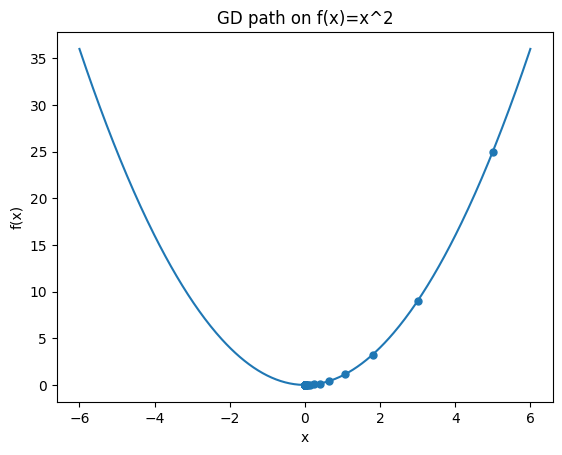

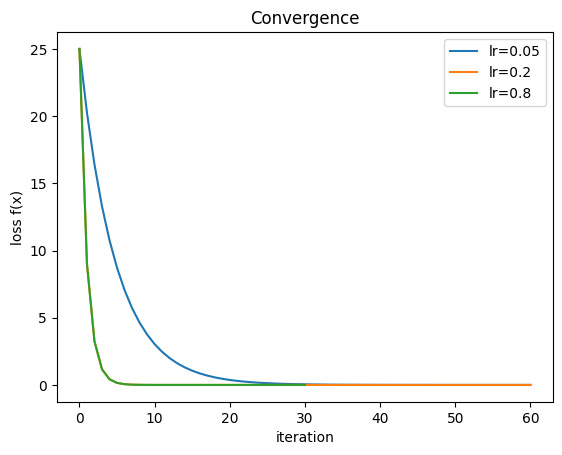

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x): return x**2
def df(x): return 2*x

def gd_1d(x0, lr=0.1, iters=50):
    xs, fs = [x0], [f(x0)]
    x = x0
    for k in range(iters):
        x = x - lr*df(x)
        xs.append(x); fs.append(f(x))
    return np.array(xs), np.array(fs)

runs = {0.05: gd_1d(5.0, 0.05, 60),
        0.2:  gd_1d(5.0, 0.2,  60),
        0.8:  gd_1d(5.0, 0.8,  30)}
xgrid = np.linspace(-6,6,400)
plt.plot(xgrid, f(xgrid))
xs,_ = runs[0.2]
plt.scatter(xs, f(xs), s=25)
plt.title("GD path on f(x)=x^2"); plt.xlabel("x"); plt.ylabel("f(x)")
plt.show()

for lr,(xs,fs) in runs.items():
    plt.plot(fs, label=f"lr={lr}")
plt.xlabel("iteration"); plt.ylabel("loss f(x)"); plt.legend(); plt.title("Convergence")
plt.show()


In [3]:
#Task 2

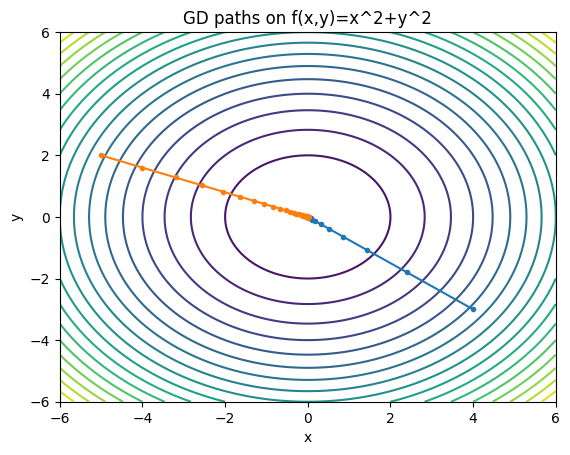

In [4]:
def f2(v):  
    x,y = v
    return x*x + y*y

def grad2(v):
    x,y = v
    return np.array([2*x, 2*y])

def gd_2d(v0, lr=0.1, iters=40):
    vs = [np.array(v0, dtype=float)]
    for k in range(iters):
        vs.append(vs[-1] - lr*grad2(vs[-1]))
    return np.array(vs)

paths = [gd_2d([4, -3], 0.2, 40), gd_2d([-5, 2], 0.1, 60)]

x = np.linspace(-6,6,200); y = np.linspace(-6,6,200)
X,Y = np.meshgrid(x,y); Z = X**2 + Y**2
plt.contour(X,Y,Z, levels=20)
for P in paths:
    plt.plot(P[:,0], P[:,1], marker='o', ms=3)
plt.title("GD paths on f(x,y)=x^2+y^2"); plt.xlabel("x"); plt.ylabel("y")
plt.show()


In [5]:
#task 3 

GD theta ~ [3.92776877 3.13378743]
SGD theta ~ [5.04355296 2.83304437]


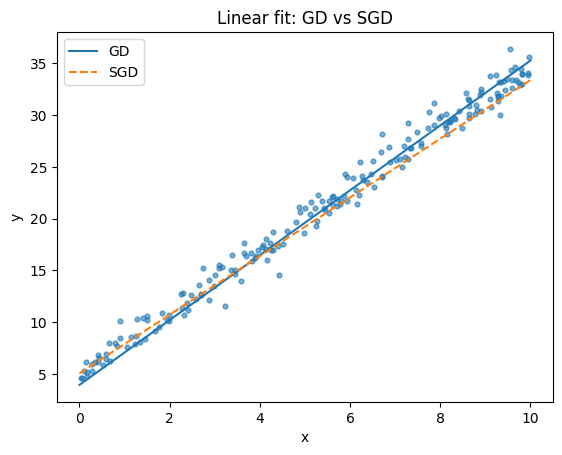

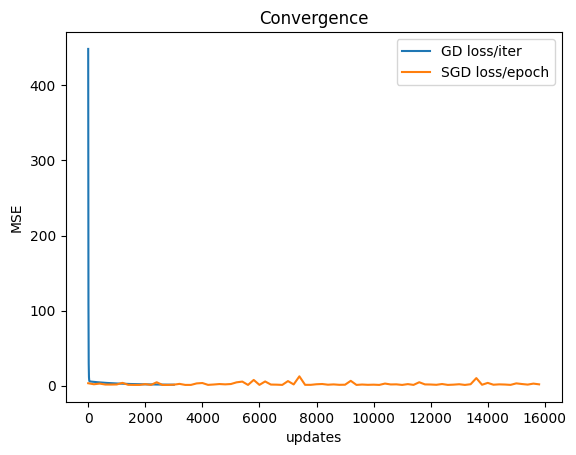

In [6]:
rng = np.random.default_rng(0)
n = 200
x = rng.uniform(0,10,size=n)
y = 3*x + 5 + rng.normal(0,1,size=n)


X = np.c_[np.ones(n), x] 

def mse(X, y, theta):
    r = X@theta - y
    return (r@r)/len(y)

def gd_linreg(X, y, lr=1e-3, iters=2000):
    theta = np.zeros(2)
    losses = []
    for k in range(iters):
        grad = (2/len(y)) * X.T @ (X@theta - y)
        theta -= lr*grad
        losses.append(mse(X,y,theta))
    return theta, np.array(losses)

def sgd_linreg(X, y, lr=1e-2, epochs=40):
    theta = np.zeros(2)
    losses = []
    m = len(y)
    for ep in range(epochs):
        idx = rng.permutation(m)
        for i in idx:
            xi = X[i]; yi = y[i]
            grad = 2*(xi@theta - yi)*xi
            theta -= lr*grad
        losses.append(mse(X,y,theta))
    return theta, np.array(losses)

theta_gd, loss_gd = gd_linreg(X,y, lr=1e-3, iters=3000)
theta_sgd, loss_sgd = sgd_linreg(X,y, lr=1e-2, epochs=80)

print("GD theta ~", theta_gd)
print("SGD theta ~", theta_sgd)

xx = np.linspace(0,10,200)
plt.scatter(x,y,s=12,alpha=0.6)
plt.plot(xx, theta_gd[0]+theta_gd[1]*xx, label="GD")
plt.plot(xx, theta_sgd[0]+theta_sgd[1]*xx, label="SGD", linestyle="--")
plt.legend(); plt.title("Linear fit: GD vs SGD"); plt.xlabel("x"); plt.ylabel("y")
plt.show()

plt.plot(loss_gd, label="GD loss/iter")
plt.plot(np.arange(len(loss_sgd))*len(x), loss_sgd, label="SGD loss/epoch")
plt.legend(); plt.xlabel("updates"); plt.ylabel("MSE"); plt.title("Convergence")
plt.show()


In [7]:
#task 4

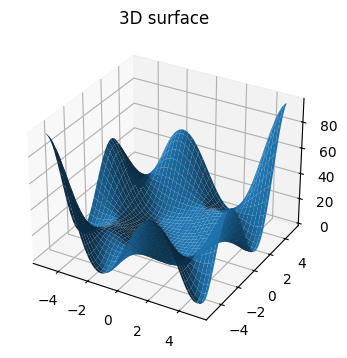

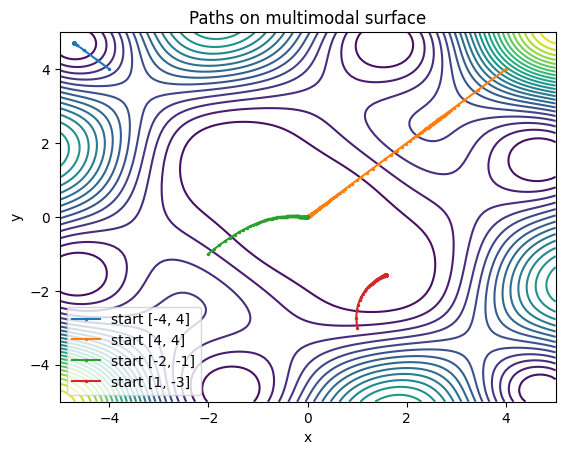

In [8]:
def fM(v):
    x,y = v
    r2 = x*x + y*y
    return r2*np.sin(x)*np.sin(y) + r2

def gM(v):
    x,y = v
    r2 = x*x + y*y
    dfdx = 2*x*np.sin(x)*np.sin(y) + r2*np.cos(x)*np.sin(y) + 2*x
    dfdy = 2*y*np.sin(x)*np.sin(y) + r2*np.sin(x)*np.cos(y) + 2*y
    return np.array([dfdx, dfdy])

def gd_path(v0, lr=0.02, iters=120):
    vs=[np.array(v0,dtype=float)]
    for k in range(iters):
        vs.append(vs[-1] - lr*gM(vs[-1]))
    return np.array(vs)

xs = np.linspace(-5,5,120); ys = np.linspace(-5,5,120)
X,Y = np.meshgrid(xs,ys)
Z = (X**2+Y**2)*np.sin(X)*np.sin(Y) + (X**2+Y**2)

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z)
ax.set_title("3D surface")
plt.show()

plt.contour(X,Y,Z, levels=30)
starts = [[-4,4],[4,4],[-2,-1],[1, -3]]
for s in starts:
    P = gd_path(s, lr=0.02, iters=150)
    plt.plot(P[:,0], P[:,1], marker='.', ms=3, label=f"start {s}")
plt.legend(); plt.title("Paths on multimodal surface"); plt.xlabel("x"); plt.ylabel("y")
plt.show()


In [9]:
#last task

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv(r"C:\Users\Aitzh\OneDrive\Рабочий стол\introml\Auto.csv")   

num_cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

df = df.dropna(subset=['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin'])

df = pd.get_dummies(df, columns=['origin'], drop_first=True)

if 'name' in df.columns:
    df = df.drop(columns=['name'])

y = df['mpg'].values
X = df.drop(columns=['mpg']).values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

ols = LinearRegression().fit(X_train, y_train)
yhat_o = ols.predict(X_test)

sgd = SGDRegressor(
    loss="squared_error",
    penalty=None,
    max_iter=5000,
    learning_rate="invscaling",
    eta0=0.01,
    random_state=0
).fit(X_train, y_train)
yhat_s = sgd.predict(X_test)

def mse(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred)

print("Train size:", len(y_train), " | Test size:", len(y_test))
print("\n--- OLS ---")
print("R2:", r2_score(y_test, yhat_o))
print("MSE:", mse(y_test, yhat_o))

print("\n--- SGD (Gradient Descent) ---")
print("R2:", r2_score(y_test, yhat_s))
print("MSE:", mse(y_test, yhat_s))

print("\n#features:", X.shape[1])
print("OLS coef shape:", ols.coef_.shape, " | SGD coef shape:", sgd.coef_.shape)



Train size: 313  | Test size: 79

--- OLS ---
R2: 0.8387519287083123
MSE: 10.022424640636546

--- SGD (Gradient Descent) ---
R2: -4.593129166433767e+26
MSE: 2.8548738950197443e+28

#features: 8
OLS coef shape: (8,)  | SGD coef shape: (8,)
